## Prediction of numbers from MNIST images using multilayer perceptron softmax model
<br>

### Loss: Cross Entropy

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
## Download the MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(f"shape of X_train is {X_train.shape}")
print(f"shape of y_train is {Y_train.shape}")
print(f"shape of X_test is {X_test.shape}")
print(f"shape of y_test is {Y_test.shape}")

shape of X_train is (60000, 28, 28)
shape of y_train is (60000,)
shape of X_test is (10000, 28, 28)
shape of y_test is (10000,)


In [4]:
## Preprocessing: Flattening array and normalizing
X_train = X_train.reshape(60000,784)/255
X_test = X_test.reshape(10000,784)/255

In [5]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
tf.compat.v1.disable_eager_execution()

In [10]:
## Target label preprocessing: One hot encoding of output
with tf.compat.v1.Session() as ses:
    Y_train = ses.run(tf.one_hot(Y_train, 10))
    Y_test = ses.run(tf.one_hot(Y_test, 10))
    

In [11]:
Y_test[2:4]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Hyperparameters:

1. Number of layers:2
2. NUmber of Neurons: 
        Layer 1: 512
        Layer 2: 264
        output layer: 10 (softmax)
3. Weights:
        W1 = 784 x 512
        W2 = 512 x 264
        W3 = 264 x 10
4. bias:
        b1 = 512
        b2 = 264
        b3 = 10
5. learning rate
6. epoch
7. batch_size
8. batches_per_epoch


In [22]:
### Defining the neural network architecture

## NUmber of hidden layers = 2
n_input = 784
hidden1 = 512
hidden2 = 264
output = 10

## Weights - Xavier Glorat normal distribution
## Formula: sqrt(2/(n_input + hidden1))
weight1 = tf.Variable(tf.random.normal([n_input, hidden1],stddev=0.039, mean=0))
weight2 = tf.Variable(tf.random.normal([hidden1, hidden2],stddev=0.051, mean=0))
weight3 = tf.Variable(tf.random.normal([hidden2, output],stddev=0.085, mean=0))

## bias initialization

bias1 = tf.Variable(0.1 * np.random.randn(hidden1).astype(np.float32))
bias2 = tf.Variable(0.1 * np.random.randn(hidden2).astype(np.float32))
bias3 = tf.Variable(0.1 * np.random.randn(output).astype(np.float32))


In [23]:
## Hyperparameters initialization

epoch = 10
batch_size = 100
batches_per_epoch = int(X_train.shape[0]/batch_size)
learning_rate = 0.05


In [24]:
## Creating placeholders for input and output
x = tf.compat.v1.placeholder(tf.float32, [None, 784])
y = tf.compat.v1.placeholder(tf.float32, [None, 10])

In [25]:
### Multilayer perceptron: building the neural network architecture

def mlp(inpt, w1, w2, w3, b1, b2, b3):
    '''Returns the multi layered perceptron output from input and initalized weights and biases'''
    
    ## Layer 1: 784 x 512
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(inpt,w1),b1))
    print(layer_1.get_shape(), w1.get_shape(), b1.get_shape())

    ## Layer 2: 512 x 264
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,w2),b2))
    print(layer_2.get_shape(), w2.get_shape(), b2.get_shape())

    ## Layer 3: 264 x 10
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2,w3),b3))
    print(layer_3.get_shape(), w3.get_shape(), b3.get_shape())
    
    return layer_3

In [30]:
# Prediction of numbers from images
yhat = mlp(x, weight1, weight2, weight3, bias1,bias2, bias3)

# Loss function
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.math.log(yhat), axis =1))

(None, 512) (784, 512) (512,)
(None, 264) (512, 264) (264,)
(None, 10) (264, 10) (10,)


In [32]:
# Optimizer 1: Gradient Descent 
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# Optimizer 2: Adam

adam_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [ ]:
## Create tensorflow session and run it
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    # these list collects the loss value of train and test data for every epoch
    train_loss, test_loss = [], []
    
    for e in range(epoch):
        
        # these lists collects the train and test loss value of every batch
        avg_trn_cost, avg_tst_cost = [], []
    
        for batch in range(batches_per_epoch):
            
            x_data = X_train[batch*batch_size : (batch+1)*batch_size]
            y_data = Y_train[batch*batch_size : (batch+1)*batch_size]
            
            sess.run(adam_optimizer, feed_dict = {x : x_data, y : y_data})
            
            c = sess.run(cost, feed_dict = {x : x_data, y : y_data})
            avg_trn_cost.append(c)
            c_tst = sess.run(cost, feed_dict = {x : X_test, y : Y_test})            
            avg_tst_cost.append(c_tst)   

        train_loss.append(np.mean(avg_trn_cost))
        test_loss.append(np.mean(avg_tst_cost))
        
    correct_prediction = tf.math.equal(tf.math.argmax(y,1), tf.math.argmax(yhat,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Train accuracy", accuracy.eval({x : X_train , y : Y_train}))
    print("Test accuracy", accuracy.eval({x : X_test , y : Y_test}))
    
    ## Visual evaluation of predicted numbers from images
    fig, axes = plt.subplots(1,10, figsize = (8,4))
    for img, ax in zip(X_test[:10], axes):
        ax.set_title(np.argmax(sess.run(yhat, feed_dict={x: [img]})))
        ax.imshow(img.reshape(28,28))
        ax.axis('off')

The single perceptron softmax model reached an accuracy of 91.7%

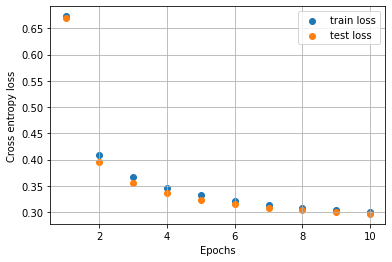

In [203]:
## plotting cross entropy loss as a function of epoch
plt.scatter(range(1, epoch+1), train_loss, label = "train loss")
plt.scatter(range(1, epoch+1), test_loss, label = "test loss")
plt.legend()
plt.grid()
plt.ylabel("Cross entropy loss")
_ = plt.xlabel("Epochs")
